# Mushroom Clasifier
> Learning how to build a powerful classifier using tensorflow and keras

- toc:true
- branch: master
- badges: true
- comments: true
- author: Juan Cruz Alric
- categories: [deep-learning, jupyter, tensorflow, keras, machine_learning]

In [81]:
import pandas as pd
import numpy as np
import matplotlib as plt
import tensorflow as tf
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("datasets/mushrooms.csv")

In [7]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [9]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
df.shape

(8124, 23)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [54]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [55]:
lb = LabelBinarizer()
o_hot = OneHotEncoder()

In [56]:
X = df.drop(['class'], axis=1).values

In [57]:
y = df['class'].values

In [58]:
X_one_h = o_hot.fit_transform(X)

In [59]:
y_lb = lb.fit_transform(y)

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_one_h, y_lb, test_size=0.2, random_state=42)

In [61]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [62]:
X_train.shape

(5199, 117)

In [63]:
X_validate.shape

(1300, 117)

In [64]:
X_test.shape

(1625, 117)

In [88]:
tf.keras.backend.clear_session()
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, input_shape=(117,), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [89]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [90]:
history = model.fit(
    x=X_train,
    y=y_train,
    validation_data=(X_validate, y_validate),
    validation_steps=8,
    epochs=5
)

Epoch 1/5
163/163 [==============================] - 0s 2ms/step - loss: 0.1996 - accuracy: 0.9283 - val_loss: 0.0333 - val_accuracy: 0.9923
Epoch 2/5
163/163 [==============================] - 0s 1ms/step - loss: 0.0103 - accuracy: 0.9987 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 3/5
163/163 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000
Epoch 4/5
163/163 [==============================] - 0s 2ms/step - loss: 8.3745e-04 - accuracy: 1.0000 - val_loss: 9.0848e-04 - val_accuracy: 1.0000
Epoch 5/5
163/163 [==============================] - 0s 1ms/step - loss: 4.5085e-04 - accuracy: 1.0000 - val_loss: 5.6778e-04 - val_accuracy: 1.0000


In [91]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

<Figure size 432x288 with 0 Axes>

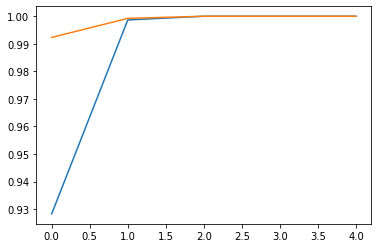

<Figure size 432x288 with 0 Axes>

In [92]:
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.figure()

<Figure size 432x288 with 0 Axes>

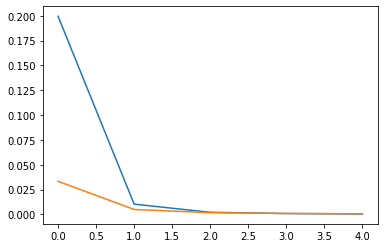

<Figure size 432x288 with 0 Axes>

In [93]:
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.figure()

In [94]:
model.evaluate(X_test, y_test)

51/51 [==============================] - 0s 2ms/step - loss: 4.9340e-04 - accuracy: 1.0000


[0.0004933957825414836, 1.0]